In [1]:
pip install opencv-python scikit-learn numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


## Importation personnelles

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import sklearn
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from math import pi

# Importations de l'API 
## Counter est un dictionnaire qui traque combien de fois des valeurs équivalentes existent, sont disponibles. 
## Le package cv2 vient de la bibliothèque opensource OPENCV qui permet en général le traitement d'images et de vidéos

In [3]:
from collections import Counter 
from sklearn.cluster import KMeans 
from matplotlib import colors 
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

## Importation de l'image avec la fonction imread qui permet d'importer l'image
## La fonction cvtColor permet de mettre l'image dans un espace de couleurs définies dans notre cas ça sera au format RGB pour cv2.COLOR_BGR2RGB.
## Exemples d'autres formats: 
## - HSV = cv2.COLOR_BGR2HSV
## - GRAY = cv2.COLOR_BGR2GRAY




In [4]:
imageTest = cv2.imread('colours.jpg') 
imageTest = cv2.cvtColor(imageTest, cv2.COLOR_BGR2RGB)

### Redimensionnement de l'image: la première ligne utilise la fonction cv2.resize() pour redimensionner l'image brute. Les dimensions finales sont de 900 pixels de large et 600 pixels de haut. La méthode d'interpolation utilisée est cv2.INTER_AREA, qui est une méthode efficace pour redimensionner les images sans en altérer la qualité.

### Transformation en vecteur: la deuxième ligne utilise la méthode .reshape() pour transformer l'image en un vecteur. L'image est transformée en un vecteur de longueur image.shape[0] * image.shape[1] et de trois canaux (profondeur de couleur de 3).

### En fin de compte, la fonction retourne l'image prétraitée sous forme de vecteur.

In [5]:
def preprocess(raw):
    imageTest = cv2.resize(raw, (900, 600), interpolation = cv2.INTER_AREA)                                          
    imageTest = imageTest.reshape(imageTest.shape[0]*imageTest.shape[1], 3)
    return imageTest

### La fonction rgb_to_hex permet de convertir la valeur de la couleur RGB en hexadécimale.
### La variable "hex_color" est initialisée avec le caractère "#", qui est le symbole standard pour désigner les couleurs hexadécimales en HTML.
### Chaque composant RGB i de la boucle est représenté par un nombre hexadécimal de deux chiffres d'où l'utilisation de la fonction int() et du formatage "{:02x} et enfin la boucle concatène chaque nombre hexadécimal en une chaîne de caractères retournée en tant que résultat de la fonction.

In [7]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        hex_color += ("{:02x}".format(int(i)))
    return hex_color

In [10]:
 def analyze(img):
    clf = KMeans(n_clusters = 5) #Définit un objet KMeans en utilisant n_clusters = 5 pour spécifier le nombre de clusters (couleurs) à rechercher dans l'image
    color_labels = clf.fit_predict(img) #Utilise la méthode fit_predict() pour classer les pixels de l'image dans les différents clusters et "color_labels" contient les étiquettes de couleur pour chaque pixel
    center_colors = clf.cluster_centers_ #Utilise la propriété "cluster_centers_" pour obtenir les couleurs centrales de chaque cluster.
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()] #Utilise une compréhension de liste pour commander les couleurs centrales en fonction du compte de pixels associé. La variable "order_colors" contient les couleurs centrales triées.
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]

    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors) 

    plt.savefig("monDiagrammeCirculaireDesCouleurs.png") 
    print("Les couleurs détectées sont les suivantes :\n") 
    for color in hex_colors:
        print(color)

Les couleurs détectées sont les suivantes :

#da2202
#166707
#0c215e
#d1a609
#8c061e


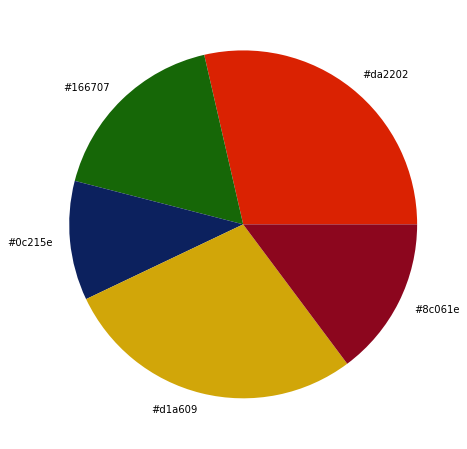

In [11]:
modified_image = preprocess(imageTest) 
analyze(modified_image)

In [12]:
def analyze(img):
    clf = KMeans(n_clusters = 10) #Définit un objet KMeans en utilisant n_clusters = 5 pour spécifier le nombre de clusters (couleurs) à rechercher dans l'image
    color_labels = clf.fit_predict(img) #Utilise la méthode fit_predict() pour classer les pixels de l'image dans les différents clusters et "color_labels" contient les étiquettes de couleur pour chaque pixel
    center_colors = clf.cluster_centers_ #Utilise la propriété "cluster_centers_" pour obtenir les couleurs centrales de chaque cluster.
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()] #Utilise une compréhension de liste pour commander les couleurs centrales en fonction du compte de pixels associé. La variable "order_colors" contient les couleurs centrales triées.
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]

    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors) 

    plt.savefig("monDiagrammeCirculaireDesCouleurs.png") 
    print("Les couleurs détectées sont les suivantes :\n") 
    for color in hex_colors:
        print(color)

Les couleurs détectées sont les suivantes :

#840610
#e5be09
#5fa809
#0d0a47
#dd5404
#0c5d06
#0a3874
#d80c02
#178bc7
#ac0655


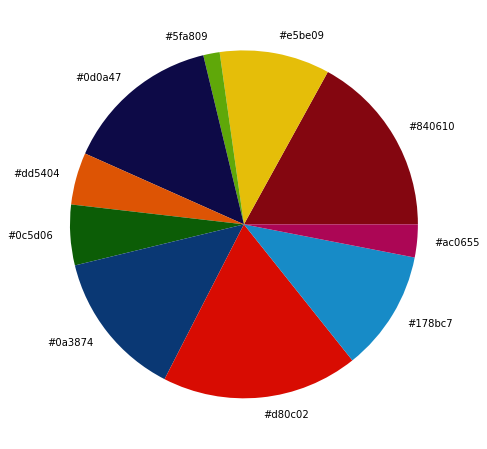

In [13]:
modified_image = preprocess(imageTest) 
analyze(modified_image)